<a href="https://colab.research.google.com/github/learnindya/Travel-Insurance-Customer-Segmentation/blob/main/Stage_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# Mengunggah file CSV
uploaded = files.upload()

Saving TravelInsurancePrediction.csv to TravelInsurancePrediction.csv


In [ ]:
# Library yang digunakan

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category = FutureWarning)

In [ ]:
import numpy as np

In [ ]:
# Membaca file CSV setelah diunggah
df = pd.read_csv('TravelInsurancePrediction.csv')

# Statistik Deskriptif

In [ ]:
# A. Check data types and column names
print("A. Tipe data dan nama kolom:")
print(df.info())

A. Tipe data dan nama kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB
None


In [ ]:
# B. Check for missing values
print("\nB. Kolom dengan nilai kosong:")
print(df.isnull().sum())



B. Kolom dengan nilai kosong:
Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64


In [ ]:
# C. Summary statistics
print("\nC. Summary statistics:")
print(df.describe(include='all'))


C. Summary statistics:
         Unnamed: 0          Age               Employment Type GraduateOrNot  \
count   1987.000000  1987.000000                          1987          1987   
unique          NaN          NaN                             2             2   
top             NaN          NaN  Private Sector/Self Employed           Yes   
freq            NaN          NaN                          1417          1692   
mean     993.000000    29.650226                           NaN           NaN   
std      573.741812     2.913308                           NaN           NaN   
min        0.000000    25.000000                           NaN           NaN   
25%      496.500000    28.000000                           NaN           NaN   
50%      993.000000    29.000000                           NaN           NaN   
75%     1489.500000    32.000000                           NaN           NaN   
max     1986.000000    35.000000                           NaN           NaN   

        AnnualI

In [ ]:
#checking duplicated values
df.duplicated().sum()

0

In [ ]:
#check each total unique value
dict = []
for i in df.columns:
    print(f'{i} = {df[i].nunique()}')

Unnamed: 0 = 1987
Age = 11
Employment Type = 2
GraduateOrNot = 2
AnnualIncome = 30
FamilyMembers = 8
ChronicDiseases = 2
FrequentFlyer = 2
EverTravelledAbroad = 2
TravelInsurance = 2


In [ ]:
df2 = df.copy()

In [ ]:
c

In [ ]:
#convert 0 to 'No' and 1 to 'Yes'
df2['TravelInsurance'] = df2['TravelInsurance'].map({0:'No', 1:'Yes'})
df2['ChronicDiseases'] = df2['ChronicDiseases'].map({0:'No', 1:'Yes'})

In [ ]:
df2.head(2)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,Yes,No,No,No
1,31,Private Sector/Self Employed,Yes,1250000,7,No,No,No,No


In [ ]:
c

,Age,AnnualIncome,FamilyMembers
count,1987.000000,1.987000e+03,1987.000000
mean,29.650226,9.327630e+05,4.752894
std,2.913308,3.768557e+05,1.609650
min,25.000000,3.000000e+05,2.000000
25%,28.000000,6.000000e+05,4.000000
50%,29.000000,9.000000e+05,5.000000
75%,32.000000,1.250000e+06,6.000000
max,35.000000,1.800000e+06,9.000000


In [ ]:
df2.describe(include=['object'])

,Employment Type,GraduateOrNot,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,1987,1987,1987,1987,1987,1987
unique,2,2,2,2,2,2
top,Private Sector/Self Employed,Yes,No,No,No,No
freq,1417,1692,1435,1570,1607,1277


Selisih mean dan mediannya kecil, sehingga kecil kemungkinan terjadinya anomali di antara masing-masing unique value

In [ ]:
#divide numerical & categorical data
num = df2.select_dtypes(exclude='object')
cat = df2.select_dtypes(include='object')

#column
numerical = num.columns
categorical = cat.columns

In [ ]:
#divide numerical & categorical data
num = df2.select_dtypes(exclude='object')
cat = df2.select_dtypes(include='object')

#column
numerical = num.columns
categorical = cat.columns

Index(['Age', 'AnnualIncome', 'FamilyMembers'], dtype='object')

In [ ]:
categorical

Index(['Employment Type', 'GraduateOrNot', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

In [ ]:
df2[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1987.0,29.650226,2.913308,25.0,28.0,29.0,32.0,35.0
AnnualIncome,1987.0,932762.959235,376855.684748,300000.0,600000.0,900000.0,1250000.0,1800000.0
FamilyMembers,1987.0,4.752894,1.609650,2.0,4.0,5.0,6.0,9.0


semua kolom mempunyai sebaran data yang sama dan tidak ada perbedaan yang signifikan antara mean dan median, serta maxnya tidak terlalu timpang

In [ ]:
df2[categorical].describe()

,Employment Type,GraduateOrNot,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,1987,1987,1987,1987,1987,1987
unique,2,2,2,2,2,2
top,Private Sector/Self Employed,Yes,No,No,No,No
freq,1417,1692,1435,1570,1607,1277


In [ ]:
df2[numerical].mode()

,Age,AnnualIncome,FamilyMembers
0,28,800000,4


Pelanggan dengan frekuensi terbanyak berusia 28 tahun, dengan Pendapatan Tahunan 800.000, dan memiliki 4 Anggota Keluarga

In [ ]:
#percentage of targets
count_target = df2['TravelInsurance'].value_counts(normalize=True).mul(100).round(2)

count_target

No     64.27
Yes    35.73
Name: TravelInsurance, dtype: float64

:Pelanggan yang membeli asuransi perjalanan hanya 35,73%

# Analisis Univariat

<ipython-input-26-9b67d3bd847a>:15: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, x=column, palette=['pink'])
<ipython-input-26-9b67d3bd847a>:15: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, x=column, palette=['pink'])
<ipython-input-26-9b67d3bd847a>:15: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, x=column, palette=['pink'])
<ipython-input-26-9b67d3bd847a>:15: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, x=column, palette=['pink'])


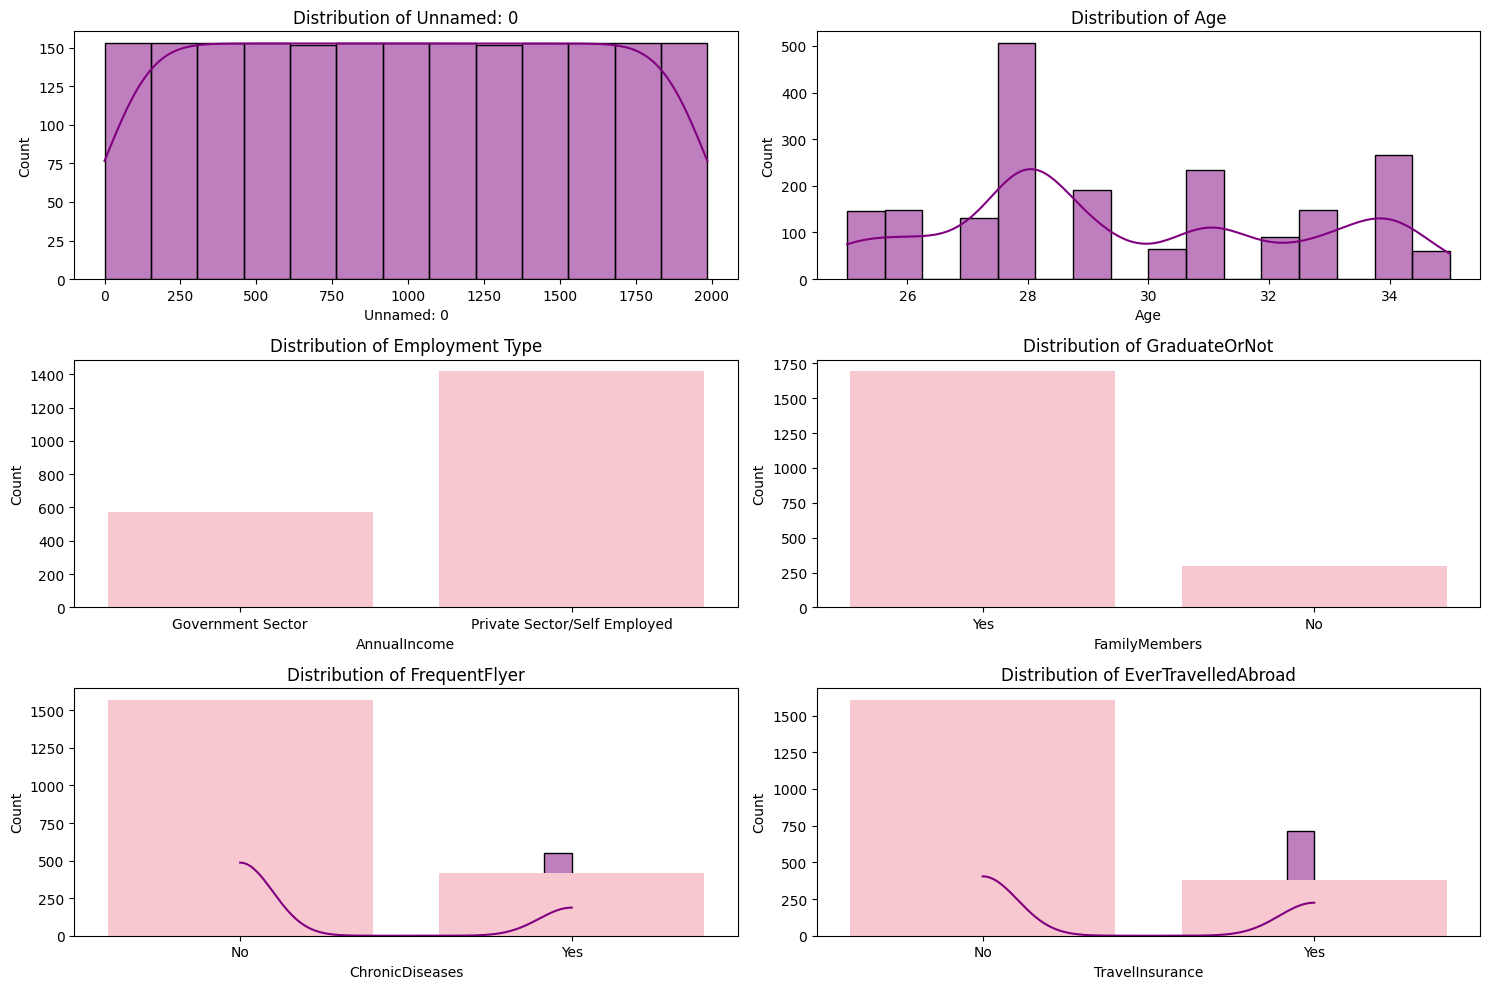

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# A. Visualisasi distribusi masing-masing kolom numerik
numerical_columns = df.select_dtypes(include=['int64']).columns
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[column], kde=True, color='purple')
    plt.title(f'Distribution of {column}')

# B. Visualisasi distribusi kolom kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 2, i + 2)
    sns.countplot(data=df, x=column, palette=['pink'])
    plt.title(f'Distribution of {column}')

# Menampilkan plot
plt.tight_layout()
plt.show()

#### Individual Distplot Analysis (Numerical)

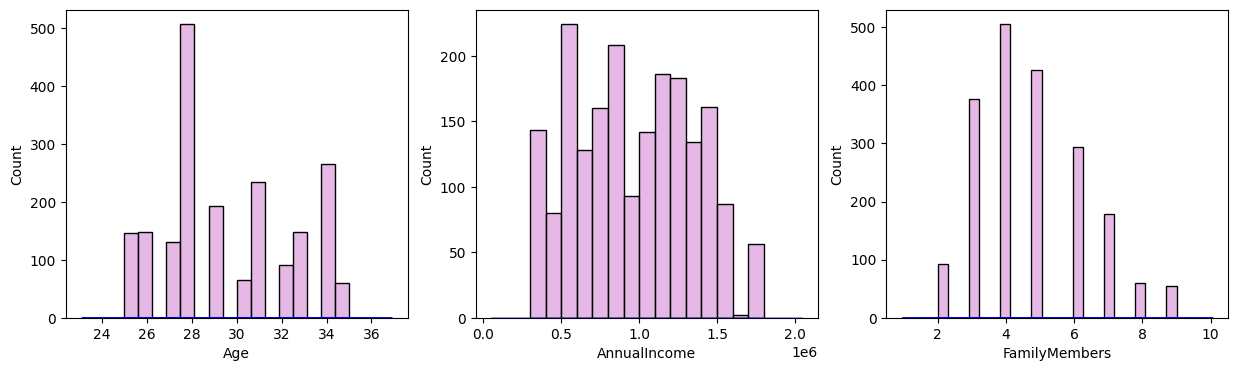

In [ ]:
features = numerical
plt.figure(figsize=(15,4))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.histplot(df2[features[i]], color='plum')
    sns.kdeplot(df2[features[i]], color='blue', shade=True)

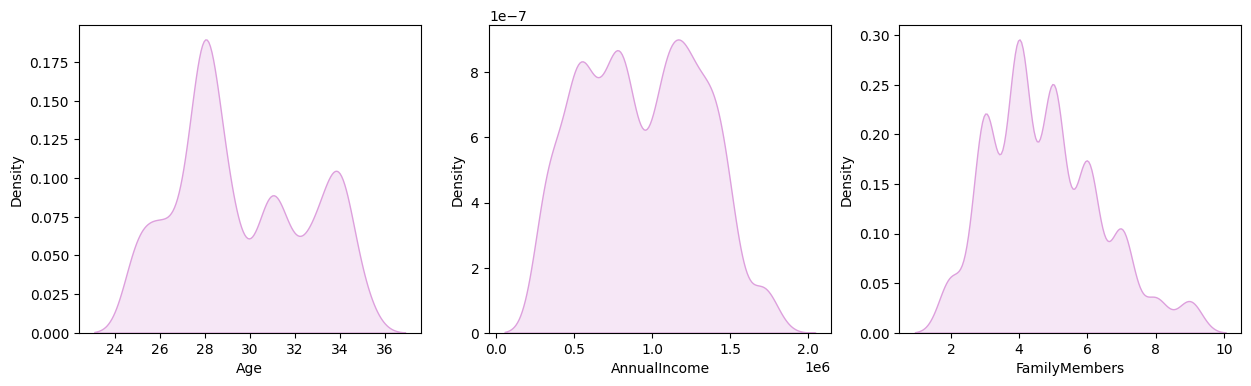

In [ ]:
features = numerical
plt.figure(figsize=(15,4))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.kdeplot(df2[features[i]], color='plum', shade=True)

In [ ]:
#skewness value
for i in range(0, len(numerical)):
    print(f'Skewness of {numerical[i]}: {df2[numerical[i]].skew().round(3)}')

Skewness of Age: 0.24
Skewness of AnnualIncome: 0.078
Skewness of FamilyMembers: 0.561


Dari nilai visualisasi dan skewness, pola sebaran data numerik adalah skewness positif. Lonjakan pada plot menunjukkan angka yang paling dominan dari setiap nilai.

#### Violin Plot (Numerical)

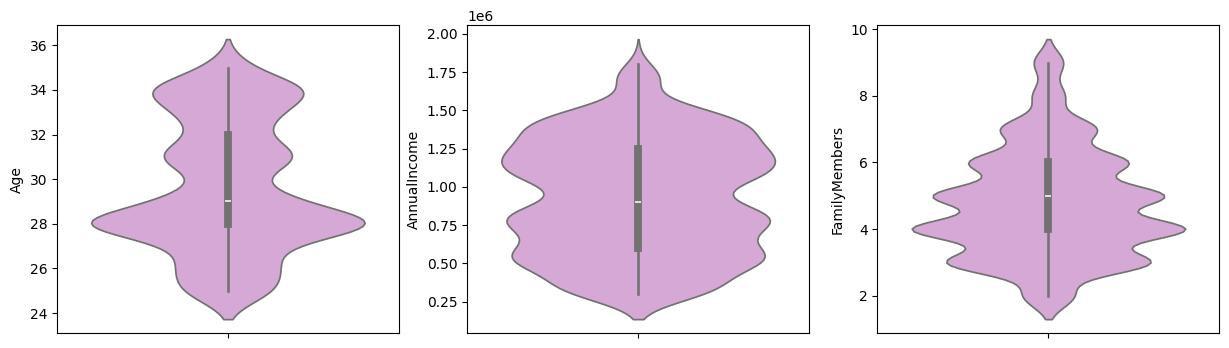

In [ ]:
features = numerical
plt.figure(figsize=(15,4))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.violinplot(df2[features[i]], color='plum')

semua nilai memiliki distribusi yang merata

# Analisis Multivariat

In [ ]:
# change all boolean columns to numerical columns to determine correlation
df2 = df.copy()

#function for coverting yes/no to binary
def convert_yesno_to_binary(x):
    if x == "Yes":
        return 1
    else:
        return 0

df2['GraduateOrNot'] = df2['GraduateOrNot'].apply(convert_yesno_to_binary)
df2['FrequentFlyer'] = df2['FrequentFlyer'].apply(convert_yesno_to_binary)
df2['EverTravelledAbroad'] = df2['EverTravelledAbroad'].apply(convert_yesno_to_binary)
df2['ChronicDiseases'] = df2['ChronicDiseases'].apply(convert_yesno_to_binary)

df2.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,1,400000,6,0,0,0,0
1,1,31,Private Sector/Self Employed,1,1250000,7,0,0,0,0
2,2,34,Private Sector/Self Employed,1,500000,4,0,0,0,1
3,3,28,Private Sector/Self Employed,1,700000,3,0,0,0,0
4,4,28,Private Sector/Self Employed,1,700000,8,0,1,0,0


<ipython-input-22-e1e2db4d3d61>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


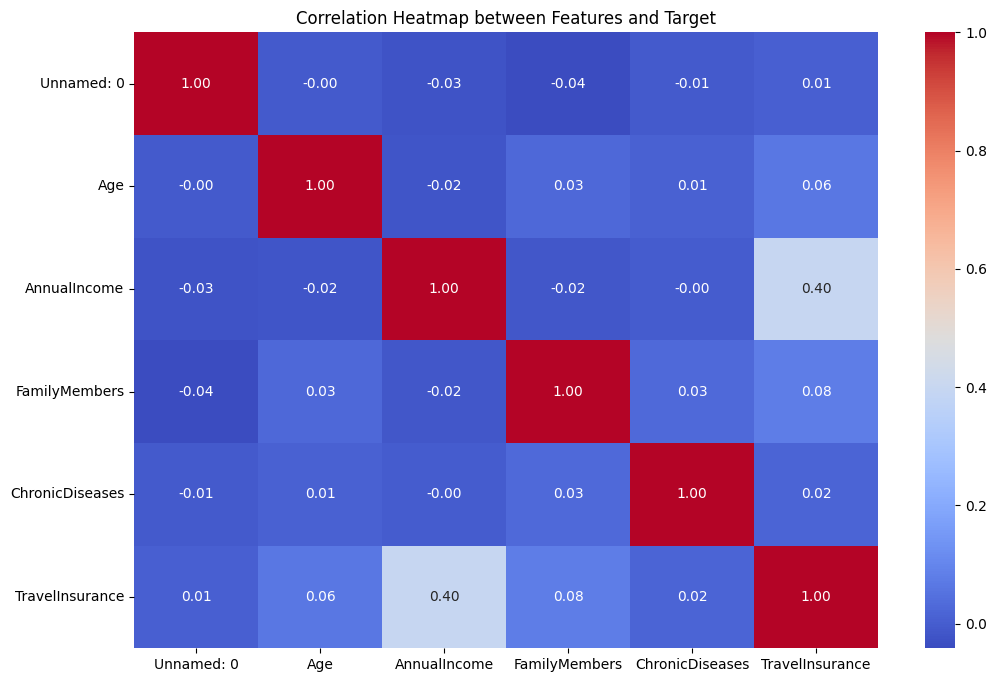

<Figure size 1500x1000 with 0 Axes>

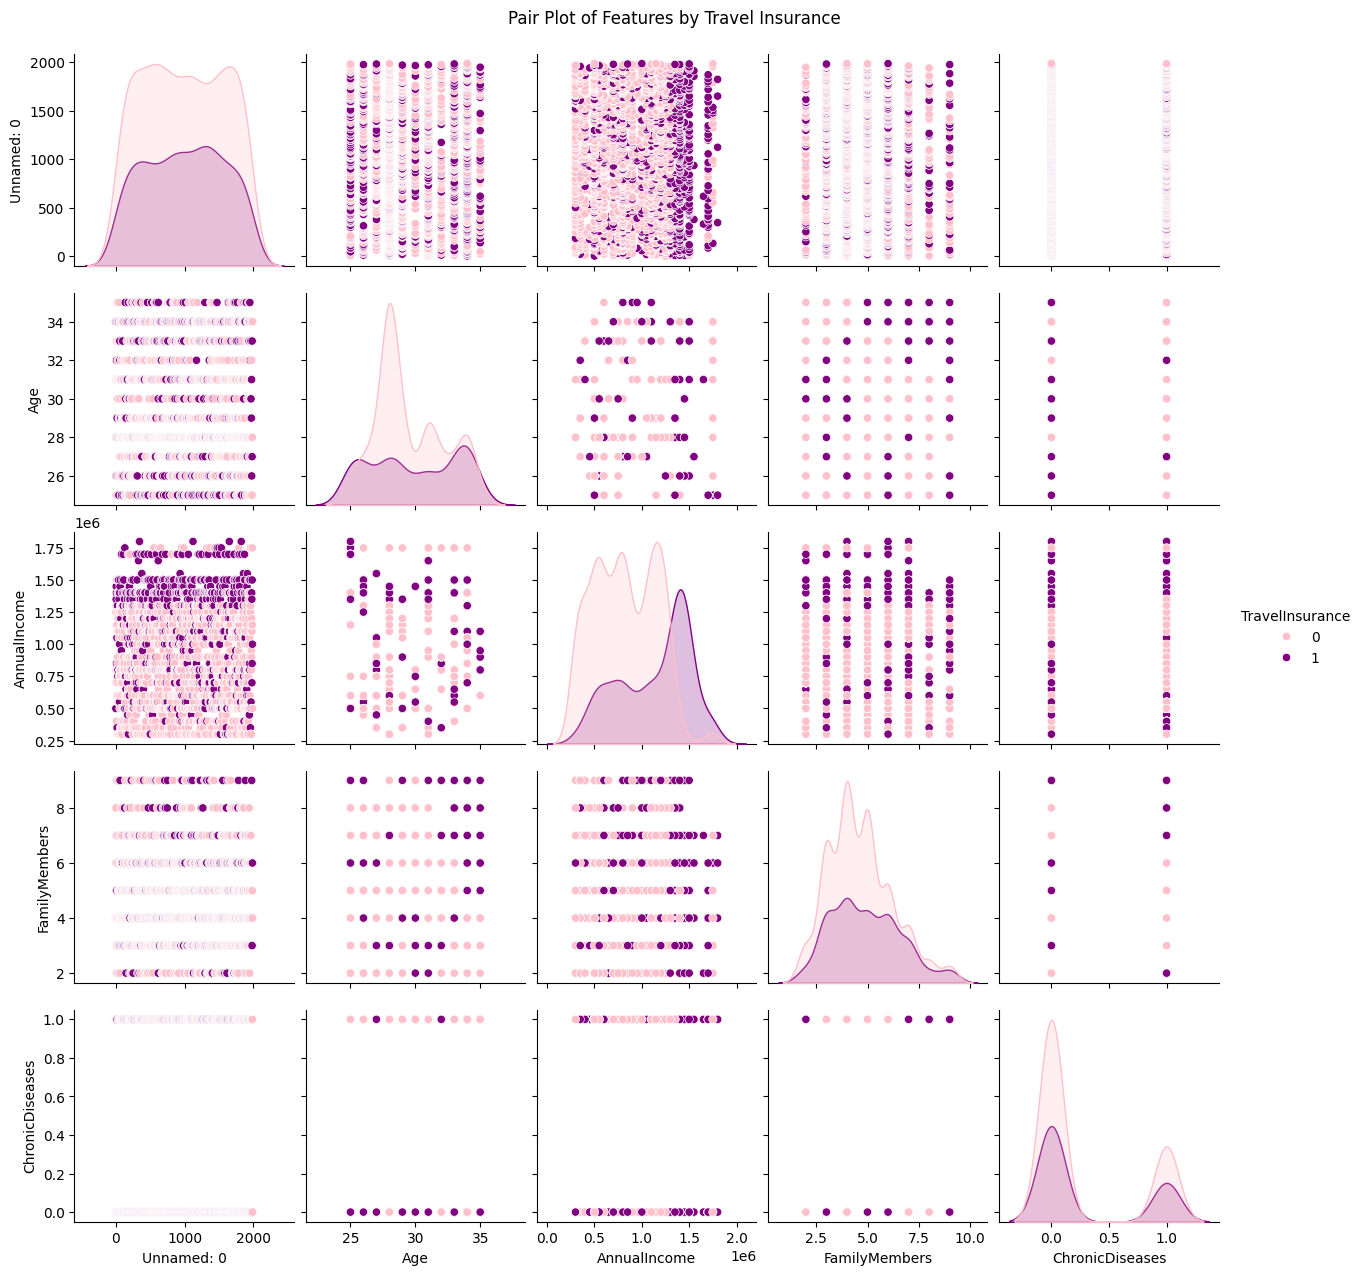

In [ ]:
# A. Korelasi antara masing-masing feature dan label
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Features and Target')
plt.show()

# B. Korelasi antar-feature
plt.figure(figsize=(15, 10))
sns.pairplot(df, hue='TravelInsurance', palette={0: 'pink', 1: 'purple'})
plt.suptitle('Pair Plot of Features by Travel Insurance', y=1.02)
plt.show()

<Axes: >

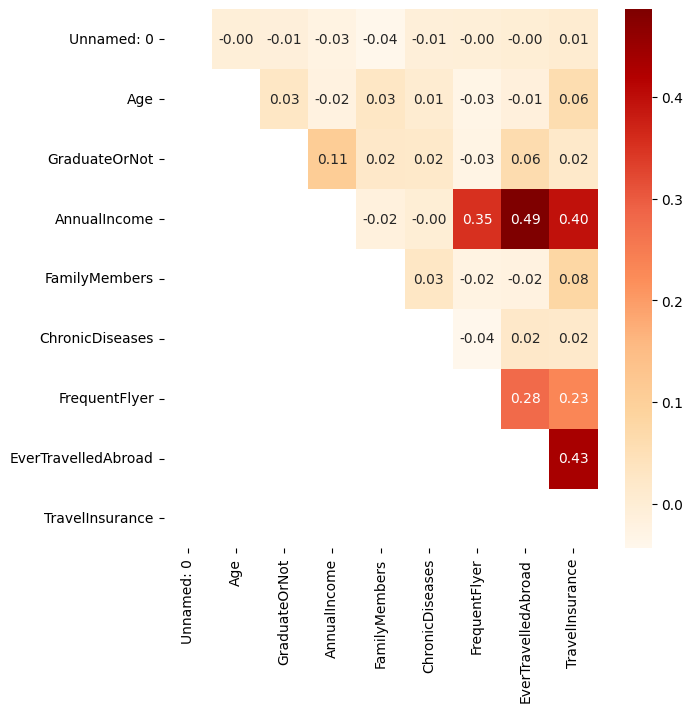

In [ ]:
# correlation between numerical features
numericals2 = df2.select_dtypes(exclude='object')
num2 = numericals2.columns
corr = numericals2.corr()

#create and apply mask
mask = corr.where(np.triu(np.ones(corr.shape, dtype=bool), k=1))

#create heatmap
plt.figure(figsize=(7,7))
sns.heatmap(mask, cmap='OrRd', annot=True, fmt='.2f')

A. Korelasi antara Feature Numerik dan Target ('TravelInsurance'):

- Target memiliki korelasi positif paling tinggi dengan EverTravelledAbroad (0.43). Customer yang pernah keluar negeri akan cenderung membeli travel insurance.
- Korelasi antara target dengan Annual Income cukup tinggi (0.4). Semakin tinggi pendapatan customer, semakin besar kemungkinan customer membeli travel insurance.
- Potensi customer yang FrequentFlyer untuk untuk membeli Travel Insurance cukup potensial (0,23). Semakin sering berpergian customer akan lebih memiliki kesadaran pentingnya memiliki sebuah Travel Insurance.

B. Korelasi antar Feature:

- Korelasi antara Annual Income dengan EverTravelledAbroad cukup tinggi (0.49), menunjukkan bahwa customer dengan pendapatan yang tinggi pernah bepergian keluar negeri.
- Korelasi antara Annual Income dengan FrequentFlyer cukup tinggi (0.35), menunjukkan bahwa customer dengan pendapatan yang tinggi sering bepergian dengan pesawat.

In [ ]:
df3 = df.copy()

In [ ]:
#change 'Yes' to 1, and 'No' to 0
df3['GraduateOrNot'] = df3['GraduateOrNot'].map({'Yes':1, 'No':0})
df3['FrequentFlyer'] = df3['FrequentFlyer'].map({'Yes':1, 'No':0})
df3['EverTravelledAbroad'] = df3['EverTravelledAbroad'].map({'Yes':1, 'No':0})

In [ ]:
corr = df3.corr()

In [ ]:
mask = corr.where(np.triu(np.ones(corr.shape, dtype=bool), k=1))

In [ ]:
high_correlation = [col for col in mask.index if any (mask[col] > 0.7)]
high_correlation

[]

tidak ada fitur yang berkorelasi kuat (>0,7), artinya tidak ada fitur redundant

##### Graduate or Not with Numerical

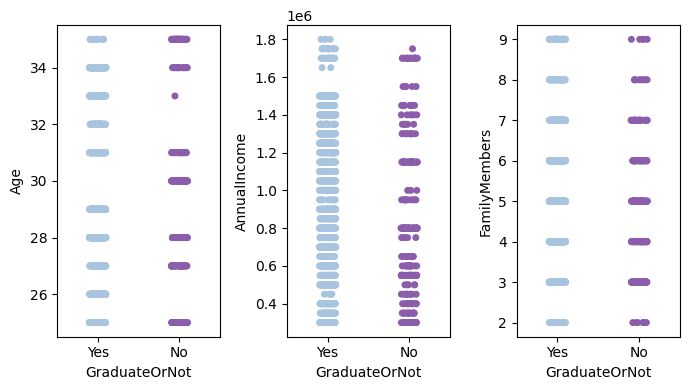

In [ ]:
fig = plt.figure(figsize=(7,4))
for i in range(0, len(numerical)):
    ax = fig.add_subplot(1, 3, i+1)
    sns.stripplot(ax = ax, data = df2, x='GraduateOrNot', y=numerical[i], palette='BuPu')
    plt.tight_layout()

##### ChronicDiseases with Numerical

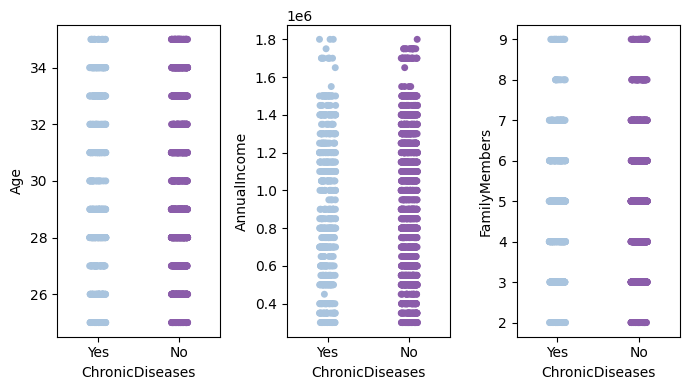

In [ ]:
fig = plt.figure(figsize=(7,4))
for i in range(0, len(numerical)):
    ax = fig.add_subplot(1, 3, i+1)
    sns.stripplot(ax = ax, data = df2, x='ChronicDiseases', y=numerical[i], palette='BuPu')
    plt.tight_layout()

##### FrequentFlyer with Numerical

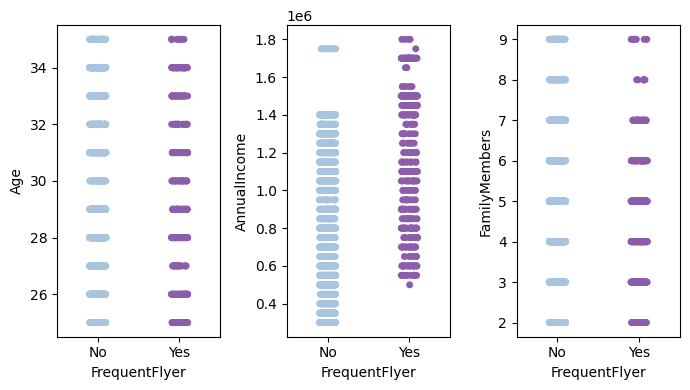

In [ ]:
fig = plt.figure(figsize=(7,4))
for i in range(0, len(numerical)):
    ax = fig.add_subplot(1, 3, i+1)
    sns.stripplot(ax = ax, data = df2, x='FrequentFlyer', y=numerical[i], palette='BuPu')
    plt.tight_layout()

##### EverTravelledAbroad  with Numerical

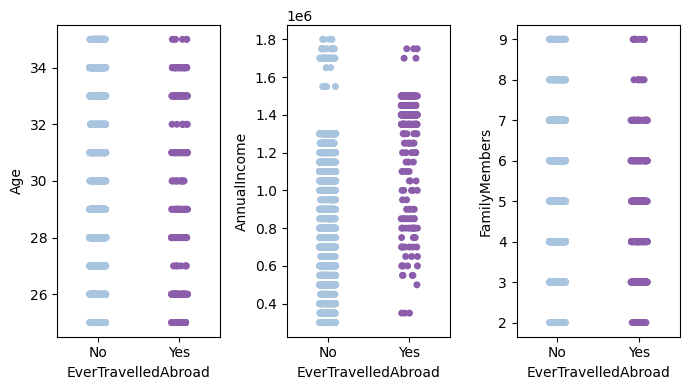

In [ ]:
fig = plt.figure(figsize=(7,4))
for i in range(0, len(numerical)):
    ax = fig.add_subplot(1, 3, i+1)
    sns.stripplot(ax = ax, data = df2, x='EverTravelledAbroad', y=numerical[i], palette='BuPu')
    plt.tight_layout()

- Pelanggan yang berstatus sarjana, mengidap penyakit kronis, frequent flyer, dan pernah bepergian ke luar negeri memiliki rentang usia 25 - 35 tahun.
- Pelanggan yang berstatus sarjana, mengidap penyakit kronis, frequent flyer, dan pernah bepergian ke luar negeri memiliki pendapatan tahunan pada kisaran 300.000 - 1.500.000.
- Pelanggan yang berstatus sarjana, mengidap penyakit kronis, frequent flyer, dan pernah bepergian ke luar negeri memiliki anggota keluarga berkisar antara 2-9 orang

##### TravelInsurance (Target) with Numerical

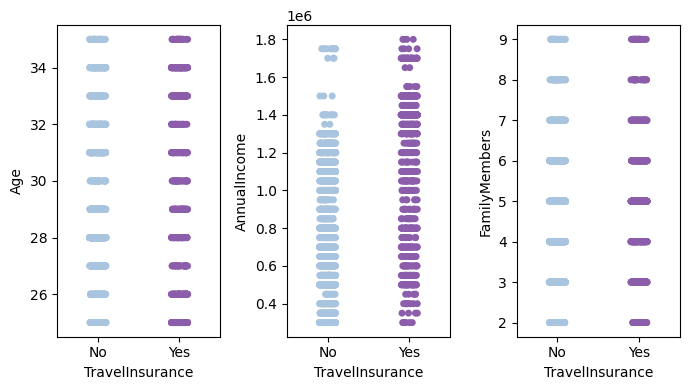

In [ ]:
fig = plt.figure(figsize=(7,4))
for i in range(0, len(numerical)):
    ax = fig.add_subplot(1, 3, i+1)
    sns.stripplot(ax = ax, data = df2, x='TravelInsurance', y=numerical[i], palette='BuPu')
    plt.tight_layout()

- tidak terdapat perbedaan yang signifikan dari sebaran pelanggan yang menggunakan asuransi perjalanan dan yang tidak terhadap 'Usia, Pendapatan Tahunan, dan Anggota Keluarga'.
- Pelanggan yang menggunakan asuransi perjalanan memiliki rentang usia 25 - 35 tahun
- Pelanggan yang menggunakan asuransi perjalanan memiliki pendapatan tahunan pada kisaran 300.000 - 1.500.000
- Pelanggan yang menggunakan asuransi perjalanan memiliki anggota keluarga berkisar 2-9 orang

# Business Insight

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dfa=pd.read_csv('drive/MyDrive/Rakamin Academy/TravelInsurancePrediction.csv')
dfa.head()

FileNotFoundError: [Errno 2] No such file or directory: 'drive/MyDrive/Rakamin Academy/TravelInsurancePrediction.csv'

In [ ]:
# change data type of column 'ChronicDiseases' from integer to object to easily understand
dfa['ChronicDiseases'] = dfa['ChronicDiseases'].replace({0: 'No', 1: 'Yes'})

In [ ]:
# divide numerical & categorical data
numerical = dfa.select_dtypes(exclude='object')
categorical = dfa.select_dtypes(include='object')
num = numerical.columns
cat = categorical.columns

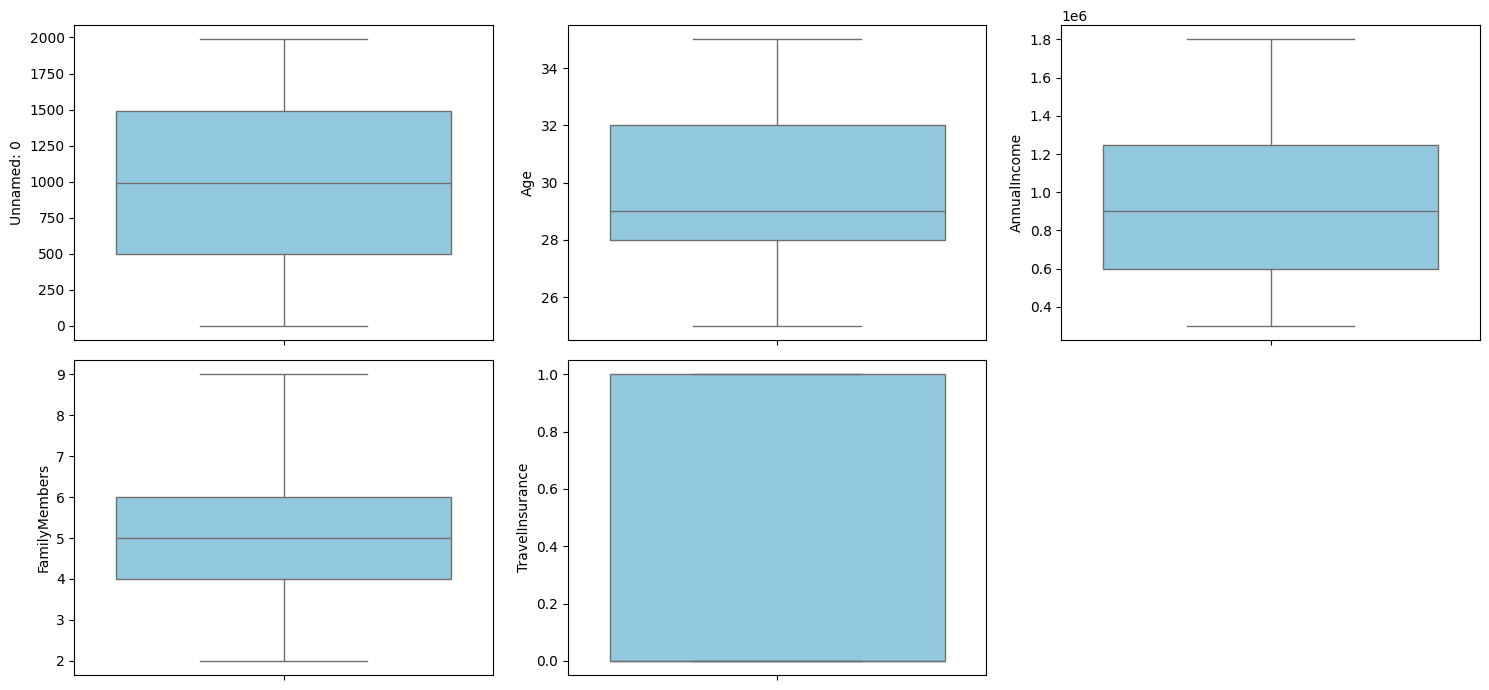

In [ ]:
# boxplot distribution of numerical features

plt.figure(figsize=(15,7))
for i in range(0, len(num)):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y = dfa[num[i]], color='skyblue', orient='v')
plt.tight_layout()

Numerical Features Insight

- Distribusi umur bervariasi, dengan mean, median, dan modus yang mirip (29.650226, 29, dan 28).
- Distribusi annual income bervariasi dan cenderung mendekati normal, dengan mean = 932,763 dan median = 900,000
- Distribusi anggota keluarga cenderung positif (positively skewed), dengan rata-rata (median) 5 orang. Anggota keluarga yang paling banyak muncul adalah 4 orang. Tiap customer memiliki setidaknya 2 orang anggota keluarga.
- Lebih dari 60% customer tidak membeli travel insurance.
- Tidak ada outlier

In [ ]:
# bar plot of categorical features (in percentage)

ax = plt.figure(figsize=(15,7))

for i, column in enumerate(cat, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=categorical, x=column, order=categorical[column].value_counts().index, palette='hls', hue=column)
    plt.title(f'Distribution of {column}')
    plt.ylabel('Number of customer')

   # Calculate and display percentages on top of each bar
    total = len(categorical[column])
    for p in plt.gca().patches:
        height = p.get_height()
        plt.gca().text(p.get_x() + p.get_width() / 2, height + 0.1, f'{height/total:.1%}', ha='center', fontsize=8)

    plt.tight_layout()

NameError: name 'plt' is not defined

Categorical Features Insight

- Lebih dari 70% customer adalah karyawan swasta dan wiraswasta
- Sekitar 85% customer adalah lulusan perguruan tinggi
- 27.8% customer mengidap penyakit kronis
- Hanya 21% customer yang sering bepergian dengan pesawat
- Hanya 19% customer yang pernah traveling keluar negeri

In [ ]:
df4 = df2.copy()

In [ ]:
df4['TravelInsurance'] = df4['TravelInsurance'].map({'No':0, 'Yes':1})
df4.head(2)

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,Yes,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,No,No,No,0


### GraduateOrNot

In [ ]:
graduate_travel_avg = df4.groupby('GraduateOrNot')['TravelInsurance'].value_counts(normalize=True).unstack()*100
graduate_travel_avg

TravelInsurance,0,1
GraduateOrNot,,
No,66.440678,33.559322
Yes,63.888889,36.111111


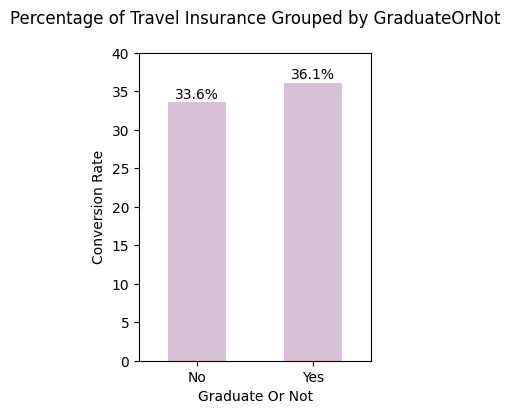

In [ ]:
# Plot bar chart
fig = plt.figure(figsize=(3,4))
ax = graduate_travel_avg[1].plot(kind='bar', stacked=True, color='thistle')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height + 1), ha='center', va='center')

plt.xticks(rotation=0)
plt.ylim(0, 40)

plt.xlabel('Graduate Or Not')
plt.ylabel('Conversion Rate')
plt.title('Percentage of Travel Insurance Grouped by GraduateOrNot\n')
plt.show()

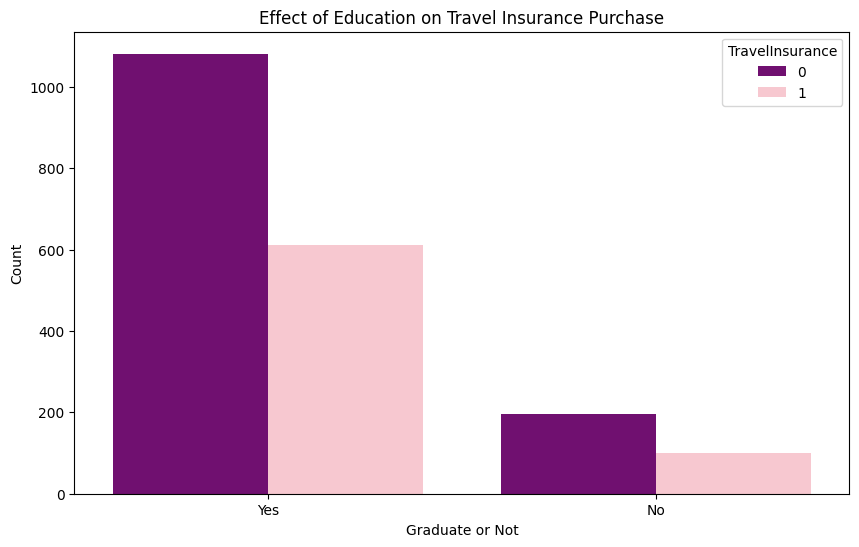

In [ ]:
# Insight 2: Pengaruh Pendidikan terhadap Pembelian Asuransi Perjalanan
plt.figure(figsize=(10, 6))
sns.countplot(x='GraduateOrNot', hue='TravelInsurance', data=df, palette={0: 'purple', 1: 'pink'})
plt.title('Effect of Education on Travel Insurance Purchase')
plt.xlabel('Graduate or Not')
plt.ylabel('Count')
plt.show()

**Insight:**
- Pengaruh pendidikan (Graduate or Not) terhadap travel insurance tampaknya tidak terlalu besar. Tingkat conversion rate antara Graduate dan Non-Graduate hampir sama, dengan tingkat conversion untuk Graduate sedikit lebih tinggi yaitu 36.1%.
  
   
**Asumsi kemungkinan rendahnya conversion rate Lulusan Sarjana dan Non-Sarjana :**
- Memiliki pendapatan terbatas yang dapat dibelanjakan untuk biaya perjalanan tambahan seperti asuransi.
- Lebih memprioritaskan petualangan dan eksplorasi daripada keamanan finansial, sehingga membuat mereka meremehkan kebutuhan akan asuransi.

### Employment Type

In [ ]:
employment_travel_avg = df4.groupby('Employment Type')['TravelInsurance'].value_counts(normalize=True).unstack()*100
employment_travel_avg

TravelInsurance,0,1
Employment Type,,
Government Sector,75.438596,24.561404
Private Sector/Self Employed,59.774171,40.225829


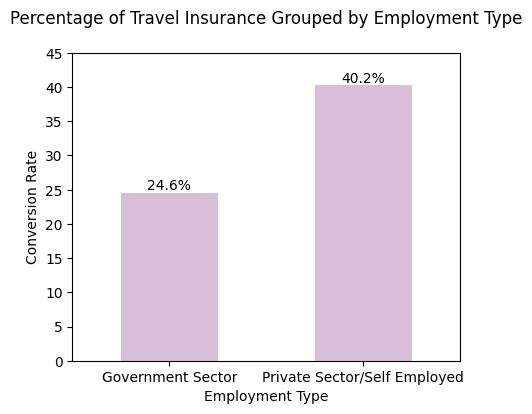

In [ ]:
# Plot bar chart
fig = plt.figure(figsize=(5,4))
ax2 = employment_travel_avg[1].plot(kind='bar', stacked=True, color='thistle')

for p in ax2.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax2.annotate(f'{height:.1f}%', (x + width/2, y + height + 1), ha='center', va='center')

plt.xticks(rotation=0)
plt.ylim(0, 45)

plt.xlabel('Employment Type')
plt.ylabel('Conversion Rate')
plt.title('Percentage of Travel Insurance Grouped by Employment Type\n')
plt.show()

**Insight:**
- Conversion rate pembelian travel insurance oleh Private Sector/Self Employed (40.2%) lebih tinggi daripada Government Sector (24.6%).  
  
**Asumsi Conversion rate Private Sector/Self Employed lebih tinggi:**  
- Pegawai sektor swasta dan wiraswasta cenderung mempunyai pendapatan rata-rata lebih tinggi dibandingkan pegawai pemerintah. Hal ini mungkin memberi mereka lebih banyak pendapatan yang dapat dibelanjakan untuk dialokasikan pada pengeluaran tambahan seperti asuransi perjalanan, sehingga meningkatkan keinginan mereka untuk membelinya.
- Pekerjaan di pemerintahan seringkali disertai dengan paket tunjangan yang kuat yang mungkin sudah mencakup beberapa tingkat perlindungan asuransi perjalanan. Hal ini dapat mengurangi kebutuhan akan asuransi perjalanan tambahan di sektor pemerintah.
- Pekerjaan di sektor swasta, terutama di bidang penjualan atau pengembangan bisnis, sering kali melibatkan lebih banyak perjalanan dibandingkan dengan posisi di pemerintahan.

###  'GraduateOrNot' and 'Employment Type' on 'TravelInsurance'

In [ ]:
pivot_grad_emp = pd.pivot_table(df4, values='TravelInsurance', index=['GraduateOrNot','Employment Type'], aggfunc='mean')

In [ ]:
pivot_grad_emp

TravelInsurance
GraduateOrNot Employment Type                              
No            Government Sector                    0.000000
              Private Sector/Self Employed         0.394422
Yes           Government Sector                    0.266160
              Private Sector/Self Employed         0.403945

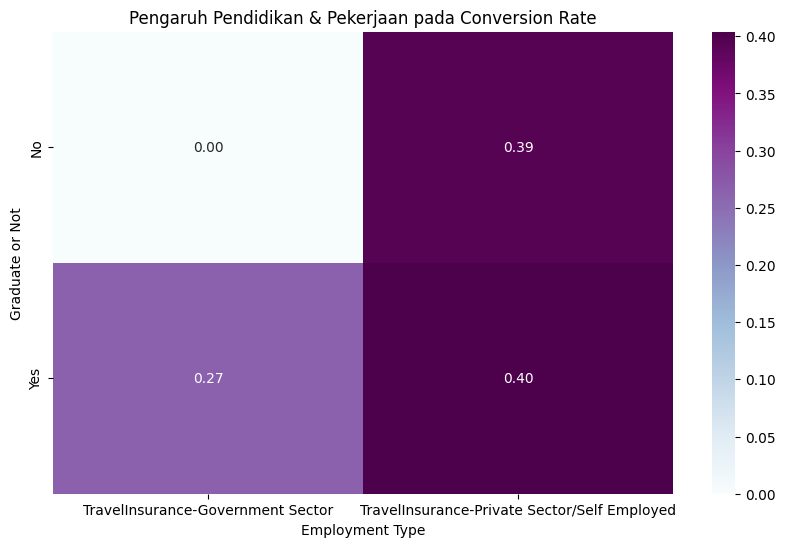

In [ ]:
# reshape pivot table
heatmap_data = pivot_grad_emp.unstack()

# plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, cmap='BuPu', fmt='.2f')
plt.xlabel('Employment Type')
plt.ylabel('Graduate or Not')
plt.title('Pengaruh Pendidikan & Pekerjaan pada Conversion Rate')
plt.show()

**Insight:**  
- Berdasarkan heatmap diperoleh bahwa lulusan yang bekerja di sektor swasta menunjukkan tingkat konversi sebesar 40%, yaitu 1,52 kali lebih tinggi dibandingkan lulusan di sektor pemerintah. Hal ini menunjukkan adanya permintaan yang besar terhadap asuransi perjalanan pada pekerjaan di sektor swasta, baik bagi lulusan maupun non-sarjana.

### Chronic Disease

In [ ]:
disease_travel_avg = df4.groupby('ChronicDiseases')['TravelInsurance'].value_counts(normalize=True).unstack()*100
disease_travel_avg

TravelInsurance,0,1
ChronicDiseases,,
No,64.808362,35.191638
Yes,62.862319,37.137681


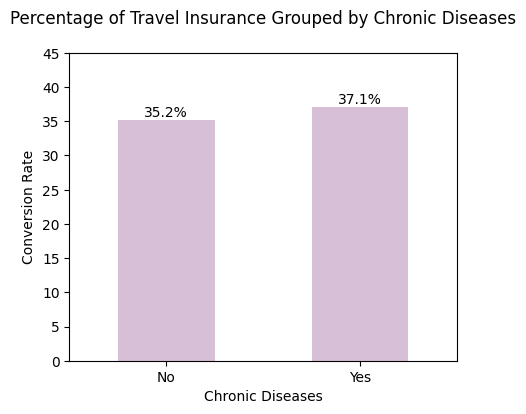

In [ ]:
# Plot bar chart
fig = plt.figure(figsize=(5,4))
ax3 = disease_travel_avg[1].plot(kind='bar', stacked=True, color='thistle')

for p in ax3.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax3.annotate(f'{height:.1f}%', (x + width/2, y + height + 1), ha='center', va='center')

plt.xticks(rotation=0)
plt.ylim(0, 45)

plt.xlabel('Chronic Diseases')
plt.ylabel('Conversion Rate')
plt.title('Percentage of Travel Insurance Grouped by Chronic Diseases\n')
plt.show()

**Insight:**  
- Dampak penyakit kronis terhadap tingkat konversi tampaknya tidak terlalu besar. Tingkat conversion rate antara Chronic Disease dan Non-Chronic Disease hampir sama, dengan tingkat conversion untuk Chronic Disease sedikit lebih tinggi yaitu 37.1%.  
  
**Asumsi kemungkinan rendahnya conversion rate Chronic Disease dan Non-Chronic Disease :**
- Meremehkan potensi risiko kesehatan yang terkait dengan perjalanan, karena percaya bahwa kondisi mereka dapat dikelola dengan baik dan tidak mungkin menimbulkan masalah selama perjalanan. Hal ini dapat membuat mereka menganggap asuransi perjalanan tidak diperlukan.
- Individu dengan penyakit kronis mungkin sudah memiliki asuransi kesehatan komprehensif yang melindungi mereka untuk keadaan darurat medis ketika melakukan perjalanan. Mereka mungkin percaya bahwa cakupan yang ada sudah cukup dan menganggap asuransi perjalanan sebagai sesuatu yang berlebihan.

### Frequent Flyer

In [ ]:
flyer_travel_avg = df4.groupby('FrequentFlyer')['TravelInsurance'].value_counts(normalize=True).unstack()*100
flyer_travel_avg

TravelInsurance,0,1
FrequentFlyer,,
No,70.000000,30.000000
Yes,42.685851,57.314149


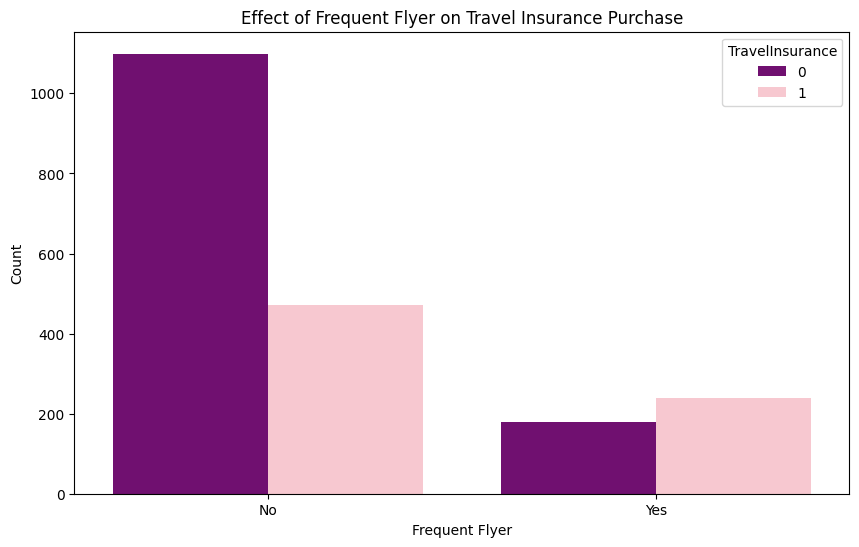

In [ ]:
# Insight 3: Pengaruh Frequent Flyer terhadap Pembelian Asuransi Perjalanan
plt.figure(figsize=(10, 6))
sns.countplot(x='FrequentFlyer', hue='TravelInsurance', data=df, palette={0: 'purple', 1: 'pink'})
plt.title('Effect of Frequent Flyer on Travel Insurance Purchase')
plt.xlabel('Frequent Flyer')
plt.ylabel('Count')
plt.show()

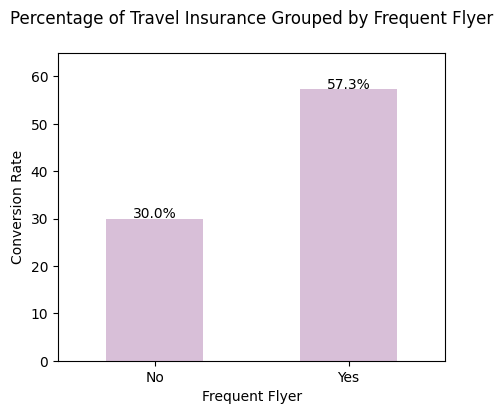

In [ ]:
# Plot bar chart
fig = plt.figure(figsize=(5,4))
ax4 = flyer_travel_avg[1].plot(kind='bar', stacked=True, color='thistle')

for p in ax4.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax4.annotate(f'{height:.1f}%', (x + width/2, y + height + 1), ha='center', va='center')

plt.xticks(rotation=0)
plt.ylim(0, 65)

plt.xlabel('Frequent Flyer')
plt.ylabel('Conversion Rate')
plt.title('Percentage of Travel Insurance Grouped by Frequent Flyer\n')
plt.show()

**Insight:**
- Conversion rate pembelian travel insurance oleh Frequent Flyer (57.3%) lebih tinggi daripada Non-Frequent Flyer (30.0%).  
  
**Asumsi Conversion rate Frequent Flyer lebih tinggi:**  
- Frequent flyer mungkin memiliki pengalaman menghadapi lebih banyak gangguan dan ketidaknyamanan perjalanan karena volume perjalanan yang lebih tinggi, sehingga meningkatkan kesadaran mereka akan potensi risiko perjalanan dan membuat mereka lebih mudah menerima nilai perlindungan dari asuransi perjalanan.
- Frequent flyer cenderung lebih memahami berbagai jenis asuransi perjalanan dan manfaatnya. Pengetahuan ini memungkinkan mereka untuk mengidentifikasi opsi perlindungan spesifik yang menjawab kebutuhan dan permasalahan perjalanan mereka, sehingga meningkatkan kesediaan mereka untuk membeli.

### Ever Travelled Abroad

In [ ]:
abroad_travel_avg = df4.groupby('EverTravelledAbroad')['TravelInsurance'].value_counts(normalize=True).unstack()*100
abroad_travel_avg

TravelInsurance,0,1
EverTravelledAbroad,,
No,74.362166,25.637834
Yes,21.578947,78.421053


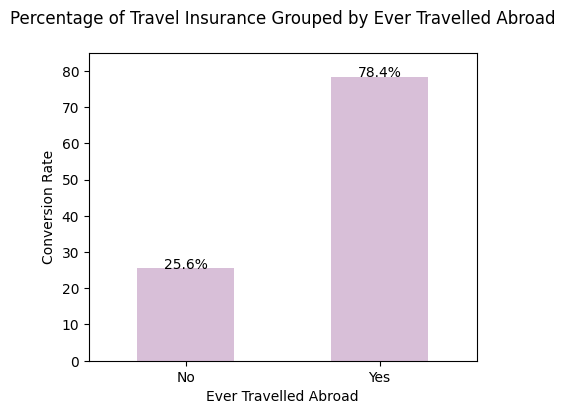

In [ ]:
# Plot bar chart
fig = plt.figure(figsize=(5,4))
ax5 = abroad_travel_avg[1].plot(kind='bar', stacked=True, color='thistle')

for p in ax5.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax5.annotate(f'{height:.1f}%', (x + width/2, y + height + 1), ha='center', va='center')

plt.xticks(rotation=0)
plt.ylim(0, 85)

plt.xlabel('Ever Travelled Abroad')
plt.ylabel('Conversion Rate')
plt.title('Percentage of Travel Insurance Grouped by Ever Travelled Abroad\n')
plt.show()

**Insight:**
- Conversion rate pembelian travel insurance oleh Ever Travelled Abroad (78.4%) lebih tinggi daripada Non-Ever Travelled Abroad (25.6%).  
  
**Asumsi Conversion rate Ever Travelled Abroad lebih tinggi:**
- Perjalanan internasional sering kali melibatkan pengaturan logistik yang rumit, lingkungan yang asing, potensi kendala bahasa, dan potensi keadaan diluar prediksi. Mereka yang memiliki pengalaman sebelumnya sangat menyadari tantangan-tantangan ini, sehingga membuat mereka menghargai keamanan dan bantuan yang ditawarkan oleh asuransi perjalanan jika terjadi masalah yang tidak terduga.

###  'FrequentFlyer' and 'EverTravelledAbroad' on 'TravelInsurance'

In [ ]:
pivot_flyer_abroad = pd.pivot_table(df4, values='TravelInsurance', index=['EverTravelledAbroad','FrequentFlyer'], aggfunc='mean')
pivot_flyer_abroad

TravelInsurance
EverTravelledAbroad FrequentFlyer                 
No                  No                    0.236377
                    Yes                   0.365462
Yes                 No                    0.707547
                    Yes                   0.880952

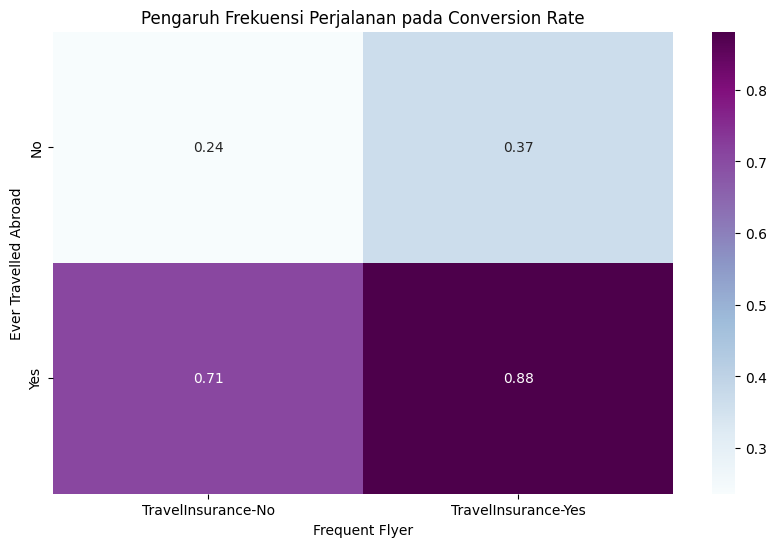

In [ ]:
# reshape pivot table
heatmap_data = pivot_flyer_abroad.unstack()

# plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, cmap='BuPu', fmt='.2f')
plt.xlabel('Frequent Flyer')
plt.ylabel('Ever Travelled Abroad')
plt.title('Pengaruh Frekuensi Perjalanan pada Conversion Rate')
plt.show()

- Berdasarkan heatmap diperoleh hasil bahwa individu yang diklasifikasikan sebagai frequent flyer, serta yang juga pernah bepergian ke luar negeri, menunjukkan tingkat konversi sebesar 88%, yaitu 3,73 kali lebih tinggi dibandingkan individu yang bukan frequent flyer dan belum pernah bepergian ke luar negeri.
- Selain itu, bahkan di kalangan non-frequent flyer, persentase pembelian asuransi perjalanan oleh mereka yang pernah bepergian ke luar negeri sangatlah tinggi (70.7%)
- Hal ini menggarisbawahi pentingnya memperoleh asuransi perjalanan bagi individu yang pernah melakukan perjalanan internasional, terlepas dari frekuensi penerbangan mereka.

### Customer Age

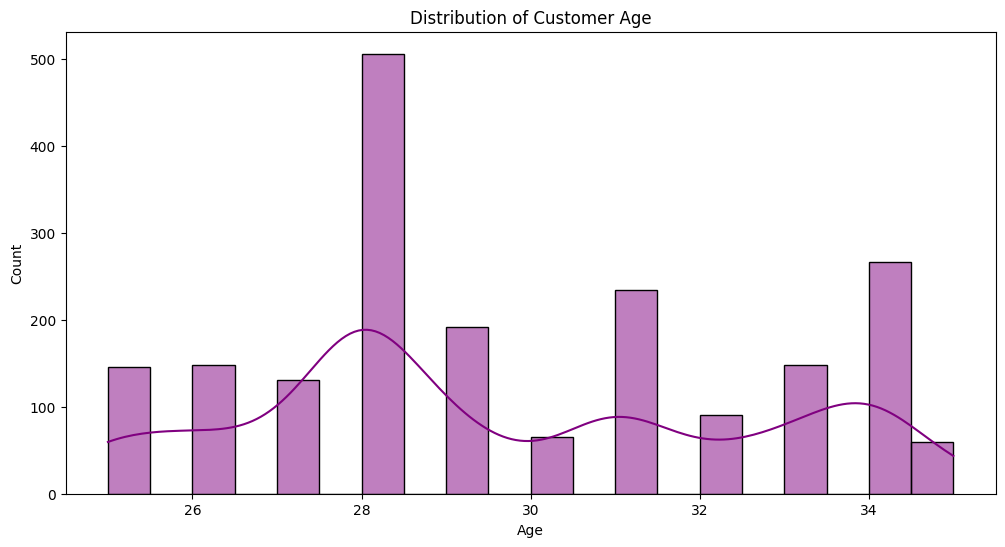

In [ ]:
# Insight 1: Distribusi Usia Pelanggan
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='purple')
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
# Specify bin edges
bins = [23, 26, 29, 32, float('inf')]

# Age category
df4['AgeCategory'] = pd.cut(df4['Age'], bins=bins, labels=["23-26", "27-29", "30-32", "32+"])

In [ ]:
age_travel_avg = df4.groupby('AgeCategory')['TravelInsurance'].value_counts(normalize=True).unstack()*100
age_travel_avg

TravelInsurance,0,1
AgeCategory,,
23-26,43.537415,56.462585
27-29,77.925211,22.074789
30-32,68.717949,31.282051
32+,49.578059,50.421941


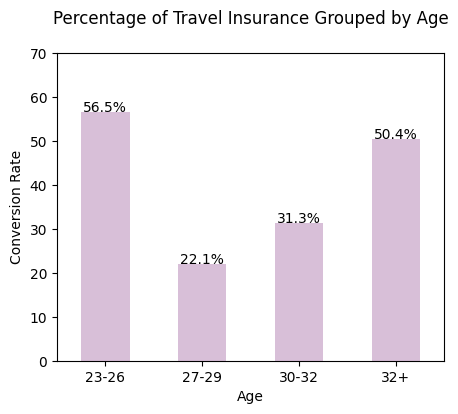

In [ ]:
# Plot bar chart
fig = plt.figure(figsize=(5,4))
ax6 = age_travel_avg[1].plot(kind='bar', stacked=True, color='thistle')

for p in ax6.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax6.annotate(f'{height:.1f}%', (x + width/2, y + height + 1), ha='center', va='center')

plt.xticks(rotation=0)
plt.ylim(0, 70)

plt.xlabel('Age')
plt.ylabel('Conversion Rate')
plt.title('Percentage of Travel Insurance Grouped by Age\n')
plt.show()

- Rentang umur 23-26 tahun memiliki conversion rate tertinggi yaitu 56.5%, diikuti oleh umur 32+ sebesar 50.4%.
- Rentang umur 27-29 tahun memiliki conversion rate terendah yaitu 22.1%

### Annual Income

In [ ]:
# Specify bin edges
bins = [0, 300000, 700000, 1100000, 1500000, float('inf')]

# Age category
df4['IncomeCategory'] = pd.cut(df4['AnnualIncome'], bins=bins, labels=["0 - 300000", "300001 - 700000", "700001 - 1100000", "1100001 - 1500000", "1500000+"])

In [ ]:
income_travel_avg = df4.groupby('IncomeCategory')['TravelInsurance'].value_counts(normalize=True).unstack()*100
income_travel_avg

TravelInsurance,0,1
IncomeCategory,,
0 - 300000,93.181818,6.818182
300001 - 700000,76.460481,23.539519
700001 - 1100000,73.658537,26.341463
1100001 - 1500000,44.131455,55.868545
1500000+,23.809524,76.190476


In [ ]:
sort_conversion_income = income_travel_avg[1].sort_values(ascending=True)
sort_conversion_income

IncomeCategory
0 - 300000            6.818182
300001 - 700000      23.539519
700001 - 1100000     26.341463
1100001 - 1500000    55.868545
1500000+             76.190476
Name: 1, dtype: float64

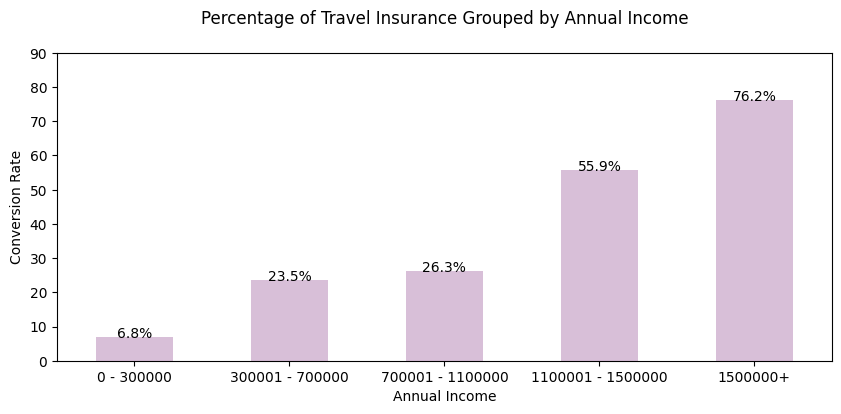

In [ ]:
# Plot bar chart
fig = plt.figure(figsize=(10,4))
ax7 = sort_conversion_income.plot(kind='bar', stacked=True, color='thistle')

for p in ax7.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax7.annotate(f'{height:.1f}%', (x + width/2, y + height + 1), ha='center', va='center')

plt.xticks(rotation=0)
plt.ylim(0, 90)

plt.xlabel('Annual Income')
plt.ylabel('Conversion Rate')
plt.title('Percentage of Travel Insurance Grouped by Annual Income\n')
plt.show()

- Conversion rate travel insurance semakin meningkat seiring dengan semakin besarnya annual income

### Family Members

In [ ]:
# Specify bin edges
bins = [1, 2, 4, 6, 8, float('inf')]

# Age category
df4['FamilyCategory'] = pd.cut(df4['FamilyMembers'], bins=bins, labels=["1-2", "3-4", "5-6", "7-8", "9+"])

In [ ]:
family_travel_avg = df4.groupby('FamilyCategory')['TravelInsurance'].value_counts(normalize=True).unstack()*100
family_travel_avg

TravelInsurance,0,1
FamilyCategory,,
1-2,70.967742,29.032258
3-4,66.553288,33.446712
5-6,63.888889,36.111111
7-8,56.962025,43.037975
9+,52.727273,47.272727


In [ ]:
sort_conversion_family = family_travel_avg[1].sort_values(ascending=True)
sort_conversion_family

FamilyCategory
1-2    29.032258
3-4    33.446712
5-6    36.111111
7-8    43.037975
9+     47.272727
Name: 1, dtype: float64

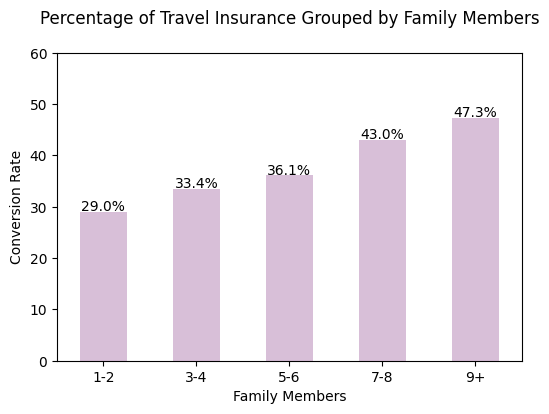

In [ ]:
# Plot bar chart
fig = plt.figure(figsize=(6,4))
ax8 = sort_conversion_family.plot(kind='bar', stacked=True, color='thistle')

for p in ax8.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax8.annotate(f'{height:.1f}%', (x + width/2, y + height + 1), ha='center', va='center')

plt.xticks(rotation=0)
plt.ylim(0, 60)

plt.xlabel('Family Members')
plt.ylabel('Conversion Rate')
plt.title('Percentage of Travel Insurance Grouped by Family Members\n')
plt.show()

- Conversion rate travel insurance semakin meningkat seiring dengan semakin banyaknya jumlah anggota keluarga.

###  'Family Members' and 'Annual Income' on 'Travel Insurance'

In [ ]:
pivot_family_income = pd.pivot_table(df4, values='TravelInsurance', index=['IncomeCategory','FamilyCategory'], aggfunc='mean')
pivot_family_income

TravelInsurance
IncomeCategory    FamilyCategory                 
0 - 300000        1-2                    0.000000
                  3-4                    0.076923
                  5-6                    0.058824
                  7-8                    0.090909
                  9+                     0.000000
300001 - 700000   1-2                    0.137931
                  3-4                    0.206107
                  5-6                    0.242424
                  7-8                    0.333333
                  9+                     0.333333
700001 - 1100000  1-2                    0.205882
                  3-4                    0.225455
                  5-6                    0.230415
                  7-8                    0.486486
                  9+                     0.466667
1100001 - 1500000 1-2                    0.565217
                  3-4                    0.554348
                  5-6                    0.573171
                  7-8                    0.506849
                  9+                     0.619048
1500000+          1-2                    0.750000
                  3-4                    0.766667
                  5-6                    0.760000
                  7-8                    0.750000

<Figure size 800x500 with 0 Axes>

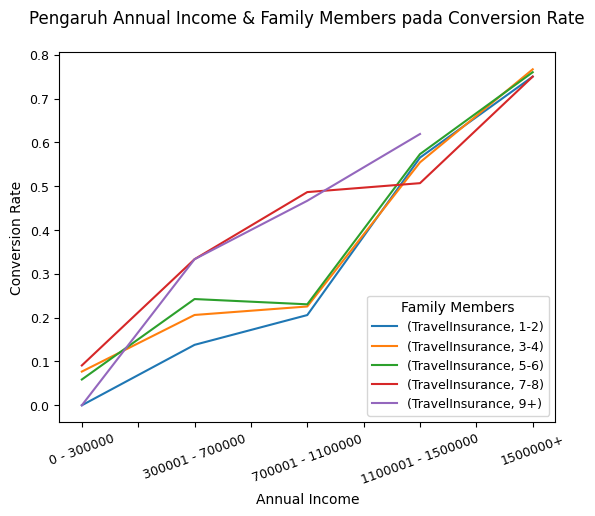

In [ ]:
# reshape pivot table
pivot_data = pivot_family_income.unstack()

# plot line
plt.figure(figsize=(8,5))
pivot_data.plot()

plt.legend(loc='lower right', title='Family Members', fontsize=9)

plt.xticks(rotation=20, fontsize=9)
plt.yticks(rotation=0, fontsize=9)

plt.xlabel('Annual Income')
plt.ylabel('Conversion Rate')
plt.title('Pengaruh Annual Income & Family Members pada Conversion Rate\n')
plt.show()

- Kecenderungan untuk membeli asuransi perjalanan meningkat secara konsisten dengan pendapatan tahunan yang lebih tinggi di semua kategori jumlah anggota keluarga, dan mencapai tingkat konversi optimumnya pada pendapatan tahunan sebesar 1500.000 atau lebih.

###  'Family Members' and 'Age' on 'Travel Insurance'

In [ ]:
pivot_family_age = pd.pivot_table(df4, values='TravelInsurance', index=['AgeCategory','FamilyCategory'], aggfunc='mean')
pivot_family_age

TravelInsurance
AgeCategory FamilyCategory                 
23-26       1-2                    0.600000
            3-4                    0.543478
            5-6                    0.594828
            7-8                    0.480000
            9+                     0.800000
27-29       1-2                    0.300000
            3-4                    0.240541
            5-6                    0.174825
            7-8                    0.211009
            9+                     0.375000
30-32       1-2                    0.294118
            3-4                    0.321839
            5-6                    0.307143
            7-8                    0.304348
            9+                     0.307692
32+         1-2                    0.153846
            3-4                    0.375000
            5-6                    0.550562
            7-8                    0.929825
            9+                     0.692308

<Figure size 800x400 with 0 Axes>

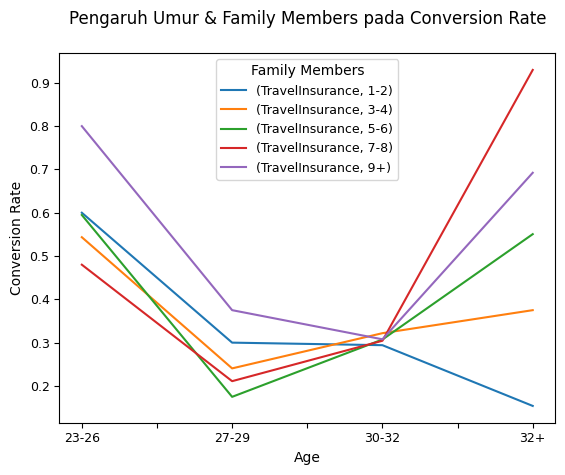

In [ ]:
# reshape pivot table
pivot_data = pivot_family_age.unstack()

# plot line
plt.figure(figsize=(8,4))
pivot_data.plot()

plt.legend(loc='upper center', title='Family Members', fontsize=9)

plt.xticks(rotation=0, fontsize=9)
plt.yticks(rotation=0, fontsize=9)

plt.xlabel('Age')
plt.ylabel('Conversion Rate')
plt.title('Pengaruh Umur & Family Members pada Conversion Rate\n')
plt.show()

 Tren pembelian asuransi perjalanan menunjukkan penurunan pada kelompok usia 23-26 tahun, diikuti tren peningkatan pada kelompok usia 27-29 tahun, kecuali individu dengan jumlah anggota keluarga 1-2 orang. Sehingga diperoleh titik optimum untuk pembelian asuransi perjalanan terjadi ketika traveler berusia 30 - 32 tahun ke atas

###  'Annual Income' and 'Age' on 'Travel Insurance'

In [ ]:
pivot_age_income = pd.pivot_table(df4, values='TravelInsurance', index=['IncomeCategory','AgeCategory'], aggfunc='mean')
pivot_age_income

TravelInsurance
IncomeCategory    AgeCategory                 
0 - 300000        27-29               0.082192
                  30-32               0.000000
300001 - 700000   23-26               0.150685
                  27-29               0.210938
                  30-32               0.136000
                  32+                 0.429688
700001 - 1100000  23-26               0.222222
                  27-29               0.184300
                  30-32               0.240741
                  32+                 0.397959
1100001 - 1500000 23-26               0.708861
                  27-29               0.320000
                  30-32               0.566176
                  32+                 0.717241
1500000+          23-26               0.866667
                  27-29               0.714286
                  30-32               0.333333
                  32+                 0.400000

<Figure size 800x400 with 0 Axes>

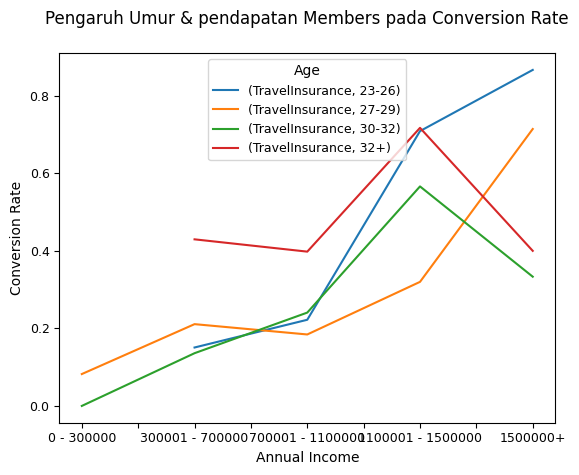

In [ ]:
# reshape pivot table
pivot_data = pivot_age_income.unstack()

# plot line
plt.figure(figsize=(8,4))
pivot_data.plot()

plt.legend(loc='upper center', title='Age', fontsize=9)

plt.xticks(rotation=0, fontsize=9)
plt.yticks(rotation=0, fontsize=9)

plt.xlabel('Annual Income')
plt.ylabel('Conversion Rate')
plt.title('Pengaruh Umur & pendapatan Members pada Conversion Rate\n')
plt.show()

konversi Travel Insurance juga cenderung meningkat seiring dengan meningkatnya pendapatan di kelompok umur manapun.

##### Insight Summary :
- Pengaruh pendidikan (Graduate or Not) terhadap travel insurance tampaknya tidak terlalu besar. Tingkat conversion rate antara Graduate dan Non-Graduate hampir sama, dengan tingkat conversion untuk Graduate sedikit lebih tinggi yaitu 36.1%
- Conversion rate pembelian travel insurance oleh Private Sector/Self Employed (40.2%) lebih tinggi daripada Government Sector (24.6%).
- Berdasarkan heatmap diperoleh bahwa lulusan yang bekerja di sektor swasta menunjukkan tingkat konversi sebesar 40%, yaitu 1,52 kali lebih tinggi dibandingkan lulusan di sektor pemerintah. Hal ini menunjukkan adanya permintaan yang besar terhadap asuransi perjalanan pada pekerjaan di sektor swasta, baik bagi lulusan maupun non-sarjana.
- Dampak penyakit kronis terhadap tingkat konversi tampaknya tidak terlalu besar. Tingkat conversion rate antara Chronic Disease dan Non-Chronic Disease hampir sama, dengan tingkat conversion untuk Chronic Disease sedikit lebih tinggi yaitu 37.1%.
- Conversion rate pembelian travel insurance oleh Frequent Flyer (57.3%) lebih tinggi daripada Non-Frequent Flyer (30.0%).
- Conversion rate pembelian travel insurance oleh Ever Travelled Abroad (78.4%) lebih tinggi daripada Non-Ever Travelled Abroad (25.6%).
- Berdasarkan heatmap diperoleh hasil bahwa individu yang diklasifikasikan sebagai frequent flyer, serta yang juga pernah bepergian ke luar negeri, menunjukkan tingkat konversi sebesar 88%, yaitu 3,73 kali lebih tinggi dibandingkan individu yang bukan frequent flyer dan belum pernah bepergian ke luar negeri. Selain itu, bahkan di kalangan non-frequent flyer, persentase pembelian asuransi perjalanan oleh mereka yang pernah bepergian ke luar negeri sangatlah tinggi (70.7%). Hal ini menggarisbawahi pentingnya memperoleh asuransi perjalanan bagi individu yang pernah melakukan perjalanan internasional, terlepas dari frekuensi penerbangan mereka.
- Rentang umur 23-26 tahun memiliki conversion rate tertinggi yaitu 56.5%, diikuti oleh umur 32+ sebesar 50.4%.
- Rentang umur 27-29 tahun memiliki conversion rate terendah yaitu 22.1%.
- Conversion rate travel insurance semakin meningkat seiring dengan semakin besarnya annual income
- Conversion rate travel insurance semakin meningkat seiring dengan semakin banyaknya jumlah anggota keluarga.
- Kecenderungan untuk membeli asuransi perjalanan meningkat secara konsisten dengan pendapatan tahunan yang lebih tinggi di semua kategori jumlah anggota keluarga, dan mencapai tingkat konversi optimumnya pada pendapatan tahunan sebesar 1500.000 atau lebih.
- Tren pembelian asuransi perjalanan menunjukkan penurunan pada kelompok usia 23-26 tahun, diikuti tren peningkatan pada kelompok usia 27-29 tahun, kecuali individu dengan jumlah anggota keluarga 1-2 orang. Sehingga diperoleh titik optimum untuk pembelian asuransi perjalanan terjadi ketika traveler berusia 32 tahun ke atas.

##### Business Recommendation
**Targeted Marketing Strategies:**  
- Mengembangkan strategi pemasaran yang ditargetkan kepada individu yang bekerja di sektor swasta, karena mereka menunjukkan tingkat konversi yang lebih tinggi.
- Fokus pada promosi asuransi perjalanan kepada frequent flyer dan individu yang pernah bepergian ke luar negeri, karena tingkat konversi yang jauh lebih tinggi pada segmen ini.  
- Menyesuaikan penawaran asuransi untuk memenuhi kebutuhan spesifik individu dengan penyakit kronis, karena penawaran tersebut menunjukkan tingkat konversi yang sedikit lebih tinggi.
- Meluncurkan kampanye pemasaran pada individu berusia 23-26 tahun dan mereka yang berusia 32 tahun ke atas, karena mereka memiliki tingkat konversi tertinggi. Tawarkan promosi atau diskon khusus untuk menarik pelanggan dalam kelompok usia ini.
-Karena melihat tren konversi yang kurang baik dari individu yang berumur 27-29 mungkin dapat membuatkan strategi promosi atau penawaran khusus untuk membuat kelompok usia ini lebih tertarik dan meningkatkan tingkat konversinya.
- Menerapkan kampanye pemasaran yang berfokus pada keluarga, dengan menekankan korelasi positif antara jumlah anggota keluarga dan tingkat konversi asuransi perjalanan. Tawarkan paket keluarga dengan manfaat tambahan untuk setiap anggota.
  
**Cross-Sell Opportunities:**  
- Memanfaatkan peluang cross-selling dengan menggabungkan asuransi perjalanan dengan produk atau layanan terkait lainnya, terutama bagi frequent flyer dan individu yang pernah bepergian ke luar negeri. Hal ini dapat meningkatkan kepuasan pelanggan dan meningkatkan penjualan secara keseluruhan.  
  
**Digital Marketing Channels:**  
- Memanfaatkan saluran pemasaran digital, seperti media sosial dan platform online, untuk menjangkau dan berinteraksi dengan khalayak yang lebih luas. Buat konten menarik yang mengomunikasikan proposisi nilai asuransi perjalanan.  
  
**Customer Retention Programs:**  
- Menerapkan program retensi pelanggan dengan menawarkan insentif loyalitas kepada pelanggan yang sudah ada. Hal ini dapat mencakup diskon perpanjangan dan manfaat tambahan untuk pelanggan jangka panjang.